Code writer: [Christian Benitez](https://github.com/christianmbr).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('./img/elena.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(284, 380, 3)

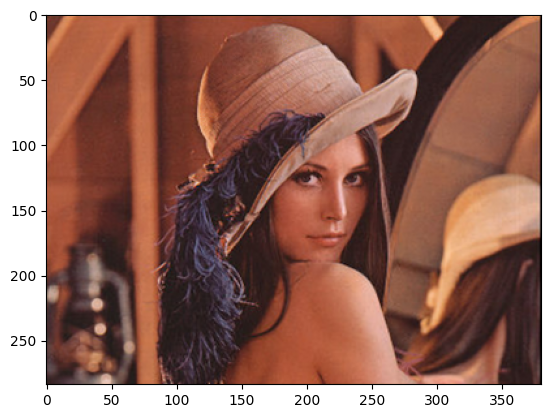

In [3]:
plt.imshow(img)

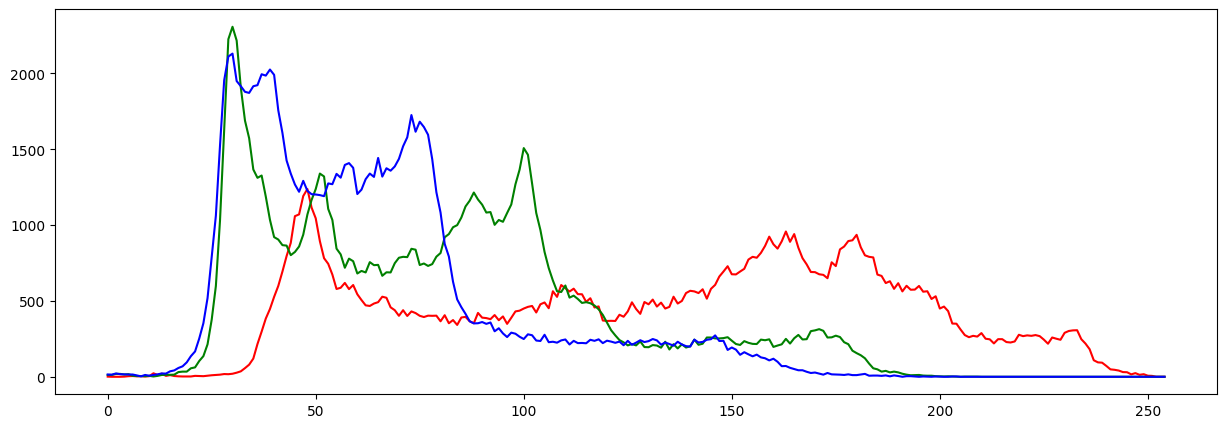

In [4]:
fig, axe = plt.subplots(1, 1, figsize=(15, 5))
colors = ('r', 'g', 'b')

for i, col in enumerate(colors):
  hist = cv2.calcHist([img], [i], None, [255], [0, 255])
  axe.plot(hist, color=col)

(50, 40, 3)


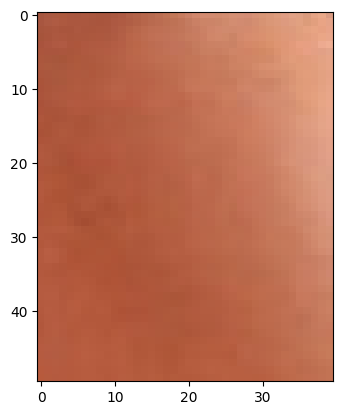

In [80]:
img_find = img[200:250,200:240]
plt.imshow(img_find)
print(img_find.shape)

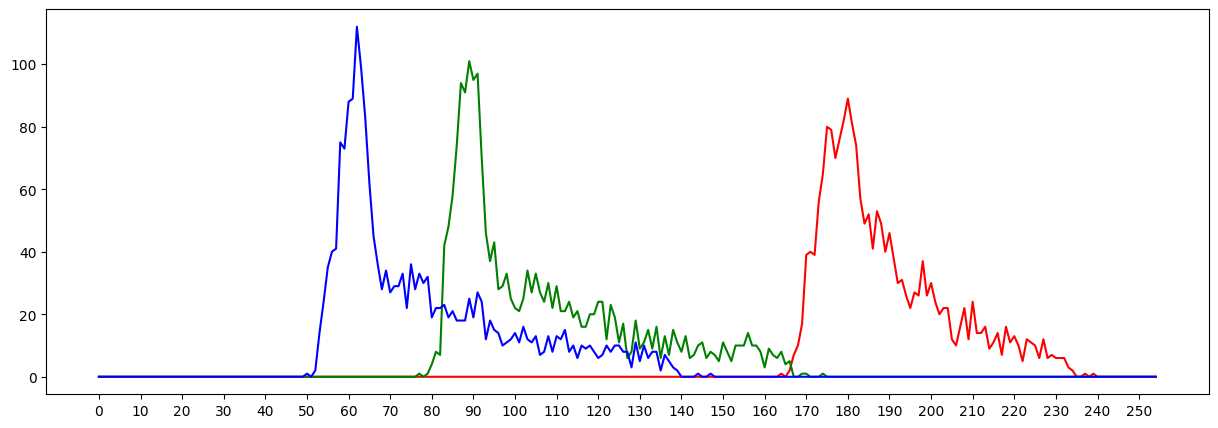

In [81]:
fig, axe = plt.subplots(1, 1, figsize=(15, 5))
colors = ('r', 'g', 'b')

for i, col in enumerate(colors):
  hist = cv2.calcHist([img_find], [i], None, [255], [0, 255])
  axe.plot(hist, color=col)
  axe.set_xticks(range(0, 255, 10))

In [65]:
def image_segmentation(img, lower, upper):
  row = img.shape[0]
  column = img.shape[1]

  mask = np.zeros([row, column], dtype='uint8')
  for i in range(row):
    for j in range(column):
      if lower[0] < img[i,j,0] < upper[0] and \
         lower[1] < img[i,j,1] < upper[1] and \
         lower[2] < img[i,j,2] < upper[2] :
        mask[i,j] = 255
      else:
        mask[i,j] = 0
  return mask

In [87]:
# lower = np.uint8([[[32, 20, 20]]])
# upper = np.uint8([[[55, 40, 41]]])

lower = [170, 80, 52]
upper = [230, 160, 140]

mask = image_segmentation(img, lower, upper)
result = cv2.bitwise_and(img, img, mask=mask)

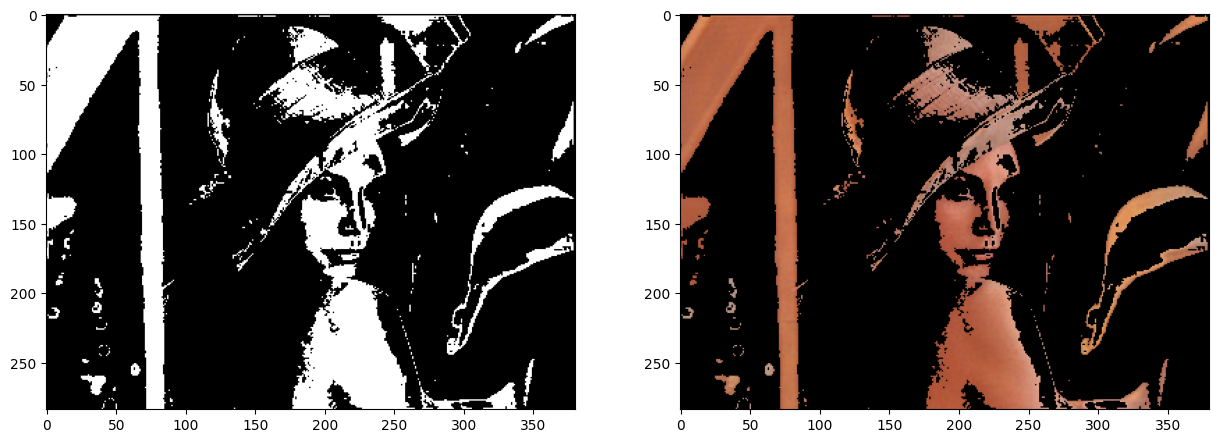

In [89]:
fig, axe = plt.subplots(1, 2, figsize=(15, 20))
axe[0].imshow(mask, cmap='gray')
axe[1].imshow(result)

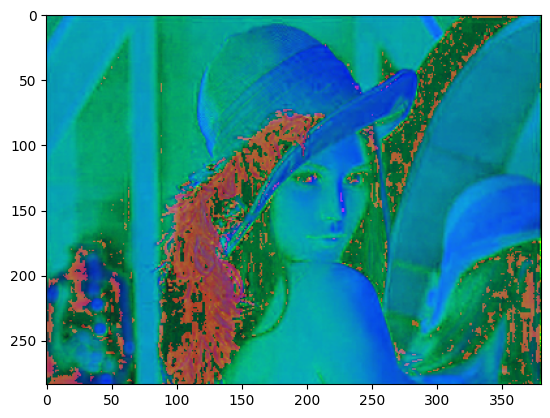

In [93]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)

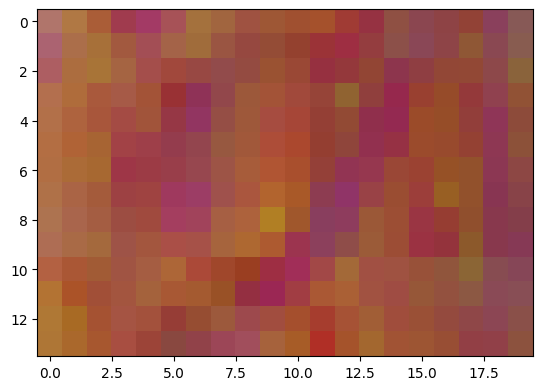

In [128]:
chop = img_hsv[150:164,100:120,:]
plt.imshow(chop)

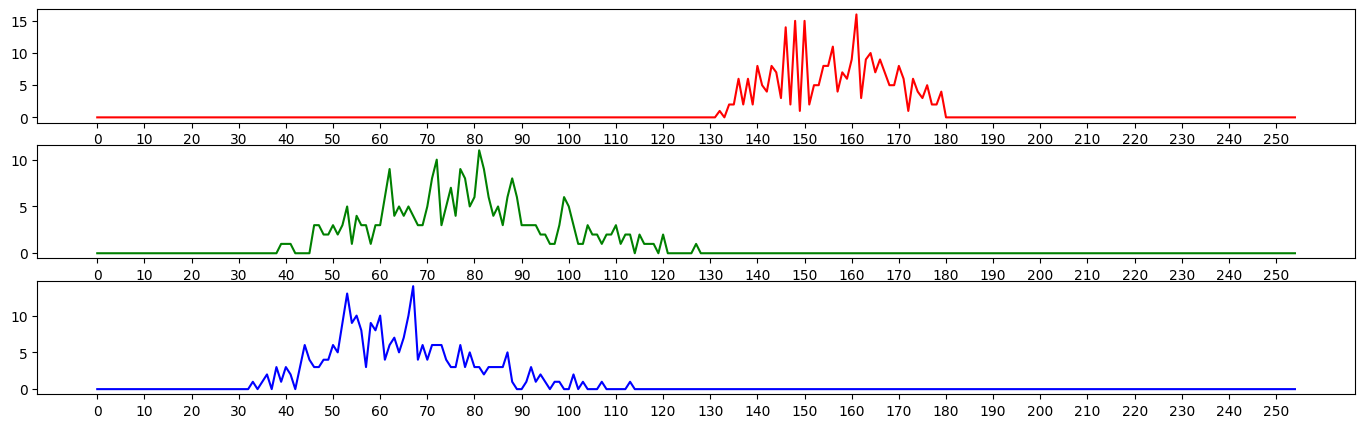

In [129]:
fig, axe = plt.subplots(3,1, figsize=(17,5))
for i, col in enumerate(colors):
  hist = cv2.calcHist([chop],[i],None,[255],[0,255])
  axe[i].plot(hist, color=col)
  axe[i].set_xticks(range(0,255,10))

# Color segmentation

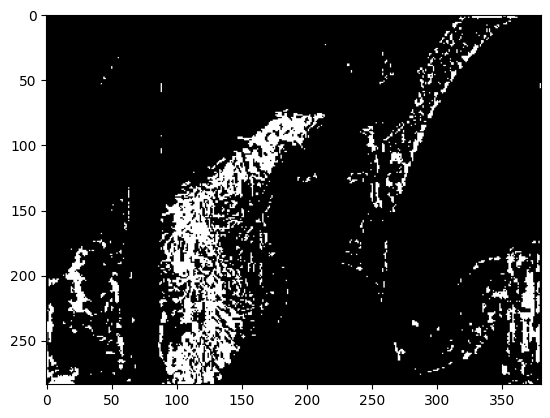

In [136]:
lower = [130, 59, 31]
upepr = [180, 120, 110]

plt.imshow(image_segmentation(img_hsv, lower, upper), cmap='gray')
plt.show()

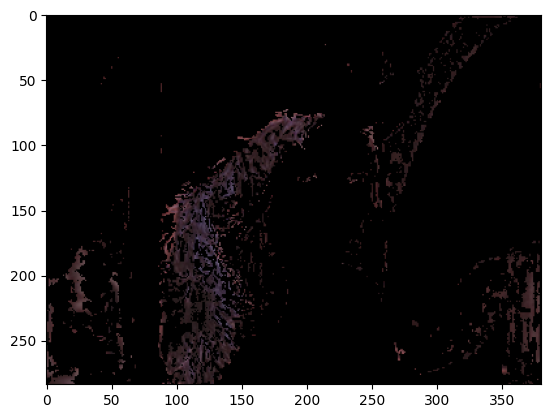

In [140]:
mask_hsv = image_segmentation(img_hsv, lower, upper)
res = cv2.bitwise_and(img_hsv, img_hsv, mask=mask_hsv)
res = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)
plt.imshow(res)